In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'dow_jones_index.data')
df.head(5)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


<h3>Acerca del DataFrame</h3>
El dataframe representa las acciones de las compañias que son utilizadas para calcular el índice de Down Jones, uno de muchos índices bursátiles 

In [4]:
# Ahora vamos a seleccionar las columnas necesarias para calcular el índice
# pasamos la fecha a tipo 'date' y el precio de cierre a 'float' 
df = pd.read_csv(r'dow_jones_index.data', usecols=[1,2,6], header=0, parse_dates=['date'],
                 converters={'close': lambda x: float(x.replace('$',''))})

In [5]:
# El DataFrame corresponde al siguiente año
print(df.date.dt.year.value_counts())
# Mes del DataFrame
print(df.date.dt.month_name().value_counts())

2011    750
Name: date, dtype: int64
April       150
January     120
February    120
March       120
May         120
June        120
Name: date, dtype: int64


<h3> Info de la fecha del DataFrame</h3>
Transcurre en el primer semestre del 2011, desde Enero hasta Junio<br>
En cada mes hay 120 registros, pero en Abril hay 150, veamos por qué

In [6]:
df['months'] = df.date.dt.month_name()
April = df['months'] == 'April'
May = df['months'] == 'May'
df.head()

,stock,date,close,months
0,AA,2011-01-07,16.42,January
1,AA,2011-01-14,15.97,January
2,AA,2011-01-21,15.79,January
3,AA,2011-01-28,16.13,January
4,AA,2011-02-04,17.14,February


In [7]:
df[April].groupby('stock')['months'].value_counts().head(3)

stock  months
AA     April     5
AXP    April     5
BA     April     5
Name: months, dtype: int64

In [8]:
df[May].groupby('stock')['months'].value_counts().head(3)

stock  months
AA     May       4
AXP    May       4
BA     May       4
Name: months, dtype: int64

 Cada accion en el mes de abril tiene 5 acciones y en el mes de mayo es de 4,<br> las acciones cotizaron 5 veces por que hubieron 5 semanas

<h3> Cuáles acciones en promedio tuvieron la mayor y menor cotización</h3>

In [9]:
stock_x_close = df.groupby('stock').agg({'close':[np.mean, np.std]})
stock_x_close.head(5)

close          
           mean       std
stock                    
AA      16.5044  0.772922
AXP     46.7124  2.396248
BA      73.4480  3.087631
BAC     13.0516  1.417382
CAT    103.1520  6.218651

Ahora tenemos una lista de cada tipo de acción(stock) con la media y desviación estándar del precio de cierre dentro de la variable stock_x_close
<br>
Ahora ordenemos de mayor a menor segun su promedio de cotización

In [10]:
stock_x_close.sort_values([('close','mean')],ascending=False)

close          
           mean       std
stock                    
IBM    163.1016  5.730211
CAT    103.1520  6.218651
CVX    101.1756  5.267066
MMM     91.6980  2.692709
UTX     84.0332  2.985547
XOM     82.1116  3.137743
MCD     77.2704  3.004153
BA      73.4480  3.087631
KO      65.3264  1.970774
PG      64.0020  1.828795
JNJ     62.6236  2.846177
TRV     59.1600  2.649218
WMT     53.9128  1.555639
DD      52.8736  2.367048
AXP     46.7124  2.396248
JPM     44.4996  2.095094
HPQ     41.5364  4.263754
DIS     41.2496  1.882473
HD      36.5600  1.270213
VZ      36.4696  0.932820
MRK     34.3604  1.666357
KRFT    32.5576  1.570584
T       29.6268  1.369257
MSFT    25.9208  1.416407
INTC    21.4352  1.072272
PFE     19.8216  0.915085
GE      19.7840  0.912022
CSCO    17.8992  1.984095
AA      16.5044  0.772922
BAC     13.0516  1.417382

<h4>IBM tuvo el promedio mas alto de 163.10 USD</h4>
<h4>BAC tuvo el promedio mas bajo de  13.05 USD</h4>

<h3> Cuáles acciones en promedio tuvieron mayor y menor variación de precio</h3>

In [11]:
stock_x_close.sort_values([('close','std')],ascending=False)

close          
           mean       std
stock                    
CAT    103.1520  6.218651
IBM    163.1016  5.730211
CVX    101.1756  5.267066
HPQ     41.5364  4.263754
XOM     82.1116  3.137743
BA      73.4480  3.087631
MCD     77.2704  3.004153
UTX     84.0332  2.985547
JNJ     62.6236  2.846177
MMM     91.6980  2.692709
TRV     59.1600  2.649218
AXP     46.7124  2.396248
DD      52.8736  2.367048
JPM     44.4996  2.095094
CSCO    17.8992  1.984095
KO      65.3264  1.970774
DIS     41.2496  1.882473
PG      64.0020  1.828795
MRK     34.3604  1.666357
KRFT    32.5576  1.570584
WMT     53.9128  1.555639
BAC     13.0516  1.417382
MSFT    25.9208  1.416407
T       29.6268  1.369257
HD      36.5600  1.270213
INTC    21.4352  1.072272
VZ      36.4696  0.932820
PFE     19.8216  0.915085
GE      19.7840  0.912022
AA      16.5044  0.772922

<h4>La acción con mas variación es CAT con 6.2 de desviación estándar, estuvo por debajo o por encima de los 100 USD </h4>
<h4>La acción con menos variación es AA, estuvo mas consistente con una desviacion de 0.77, estuvo entre los 15 USD y 16 USD</h4>

<h3> Analicemos mejor el DataFrame para encontrar relaciones y correlaciones entre las acciones</h3>

In [12]:
df_acciones = df.pivot_table(index='date',columns='stock', values='close')
df_acciones.head(3)
# Son un total de 30 columnas que corresponde a 30 acciones diferentes

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98


<h3>Ahora podemos centrarnos en estudiar el comportamiento en el tiempo de cada acción</h3>

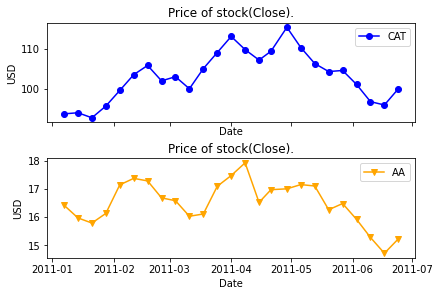

In [31]:
# Figura de 2 filas y 1 columna, que comparten el mismo eje
fig, (pan1,pan2) = plt.subplots(2,1, sharex=True, constrained_layout=True)

#Panel 1
# X = fecha, Y= acciones de CAT
pan1.plot(df_acciones.index, df_acciones.CAT, color= 'blue',marker='o',linestyle='solid',label='CAT')

#Panel 2
# X = fecha, Y= acciones de AA
pan2.plot(df_acciones.index, df_acciones.AA, color='orange',marker='v',linestyle='solid',label='AA')
for pan in fig.get_axes():
    pan.set(xlabel = 'Date', ylabel='USD',title='Price of stock(Close).')
pan1.legend()
pan2.legend()

<h4>Podemos ver que en abril ambas acciones suben de precio y luego bajan a partir de mayo y junio</h4>

<h3>Correlación entre CAT y el resto de las acciones</h3>

In [32]:
# Matriz de correlación de todas las acciones
df_acciones.corr()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


In [33]:
# Correlación de CAT con el resto de las acciones
df_acciones.corr().loc['CAT']

stock
AA      0.695727
AXP     0.255515
BA      0.627205
BAC    -0.131058
CAT     1.000000
CSCO   -0.375140
CVX     0.889416
DD      0.902856
DIS     0.712870
GE      0.463054
HD      0.617550
HPQ    -0.153858
IBM     0.665304
INTC    0.141202
JNJ    -0.072006
JPM     0.403562
KO      0.699167
KRFT    0.185959
MCD     0.106767
MMM     0.806474
MRK    -0.030892
MSFT   -0.325324
PFE     0.666647
PG     -0.226021
T       0.482533
TRV     0.778439
UTX     0.734655
VZ      0.890315
WMT    -0.170677
XOM     0.803195
Name: CAT, dtype: float64

<h4>Veamos con cuales tuvo una correlación positiva muy fuerte</h4>

In [44]:
corr_pos = df_acciones.corr().loc['CAT'][df_acciones.corr().loc['CAT']>0.8 ].sort_values(ascending=False)
corr_pos

stock
CAT    1.000000
DD     0.902856
VZ     0.890315
CVX    0.889416
MMM    0.806474
XOM    0.803195
Name: CAT, dtype: float64

<h4>Las acciones DD, VZ, CVX, MMM, XOM tienen una correlación positiva muy fuerte con CAT</h4>

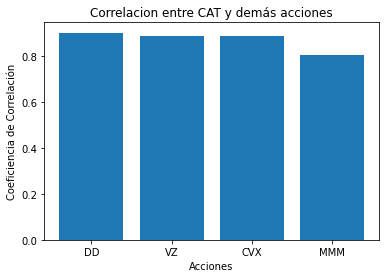

In [50]:
# Graficamos para ver mejor los datos
# Cortamos el valor de cada correlación
valores = corr_pos[1:5]

plt.bar(valores.index, valores.values)
plt.xlabel("Acciones")
plt.ylabel("Coeficiencia de Correlación")
plt.title("Correlacion entre CAT y demás acciones")
plt.show()

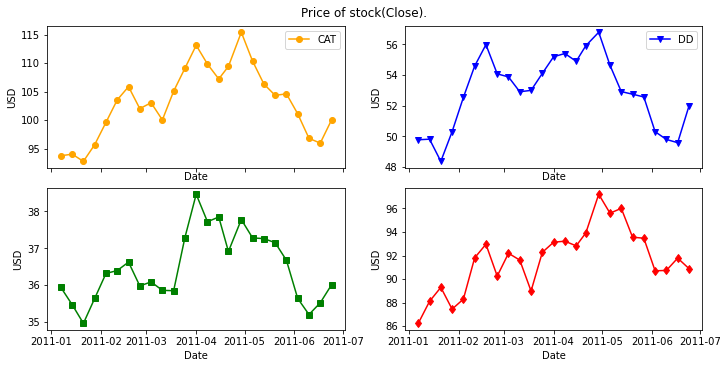

In [88]:
# Grafiquemos como estuvieron las acciones en el mismo periodo
#Figura de 4 filas y 2 columnas
fig, ((pan1,pan2),(pan3,pan4)) = plt.subplots(2,2,sharex=True,constrained_layout=True,figsize=(10,5))

#Panel 1
# X = fecha, Y= acciones de CAT
pan1.plot(df_acciones.index, df_acciones.CAT, color= 'orange',marker='o',linestyle='solid',label='CAT')

#Panel 2
# X = fecha, Y= acciones de DD
pan2.plot(df_acciones.index, df_acciones.DD, color= 'blue',marker='v',linestyle='solid',label='DD')

#Panel 3
# X = fecha, Y= acciones de VZ
pan3.plot(df_acciones.index, df_acciones.VZ, color= 'green',marker='s',linestyle='solid',label='VZ')

#Panel 4
# X = fecha, Y= acciones de MMM
pan4.plot(df_acciones.index, df_acciones.MMM, color= 'red',marker='d',linestyle='solid',label='MMM')

fig.suptitle('Price of stock(Close).')

for pan in fig.get_axes():
    pan.set(xlabel = 'Date', ylabel='USD')
pan1.legend()
pan2.legend()

plt.show()